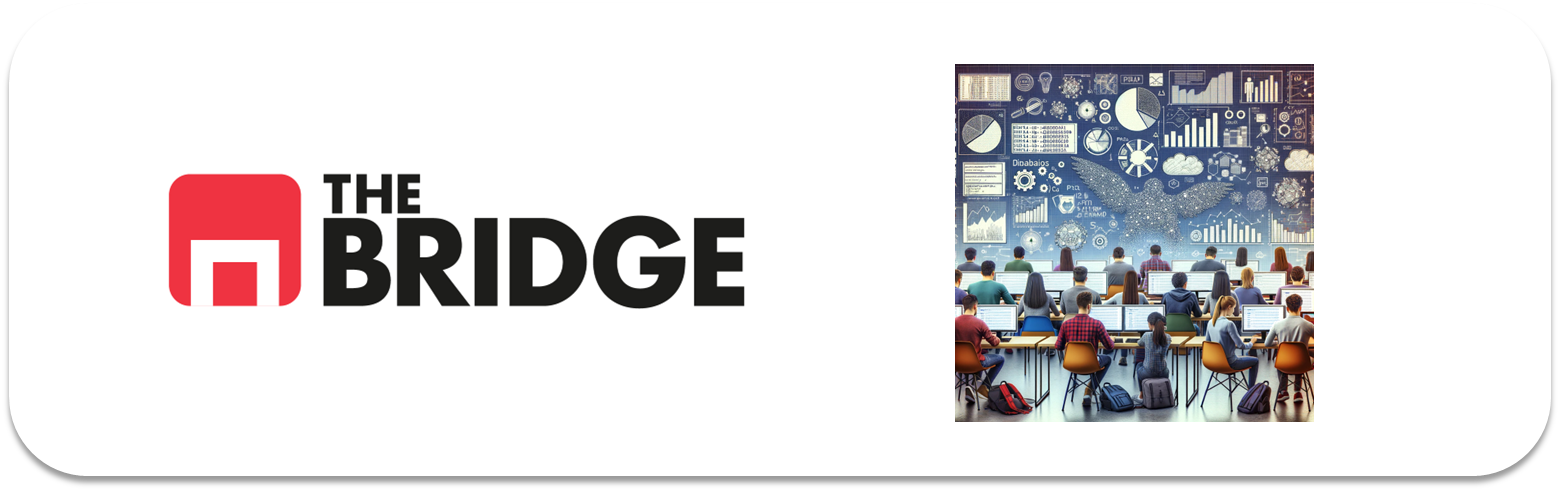

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [19]:
# Importar librerías
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns

In [20]:
# Cargar datos
casas = pd.read_csv('./data/hard_to_find/obligatoria_hard.csv', sep='|')
casas.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [21]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [22]:
# Definir la variable objetivo y las características
X = casas.drop(columns=['MEDV'])
y = casas['MEDV']

# Realizar el split en train y test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos de datos
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (404, 12)
X_test shape: (102, 12)
y_train shape: (404,)
y_test shape: (102,)


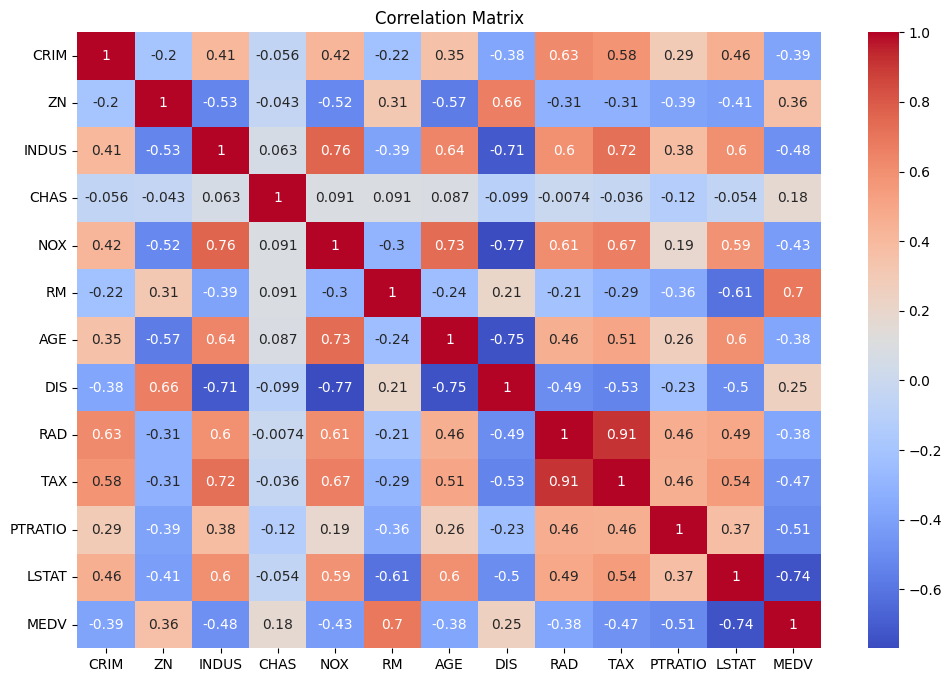

In [23]:
# Visualizar la correlación entre las características y la variable objetivo
correlation_matrix = casas.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


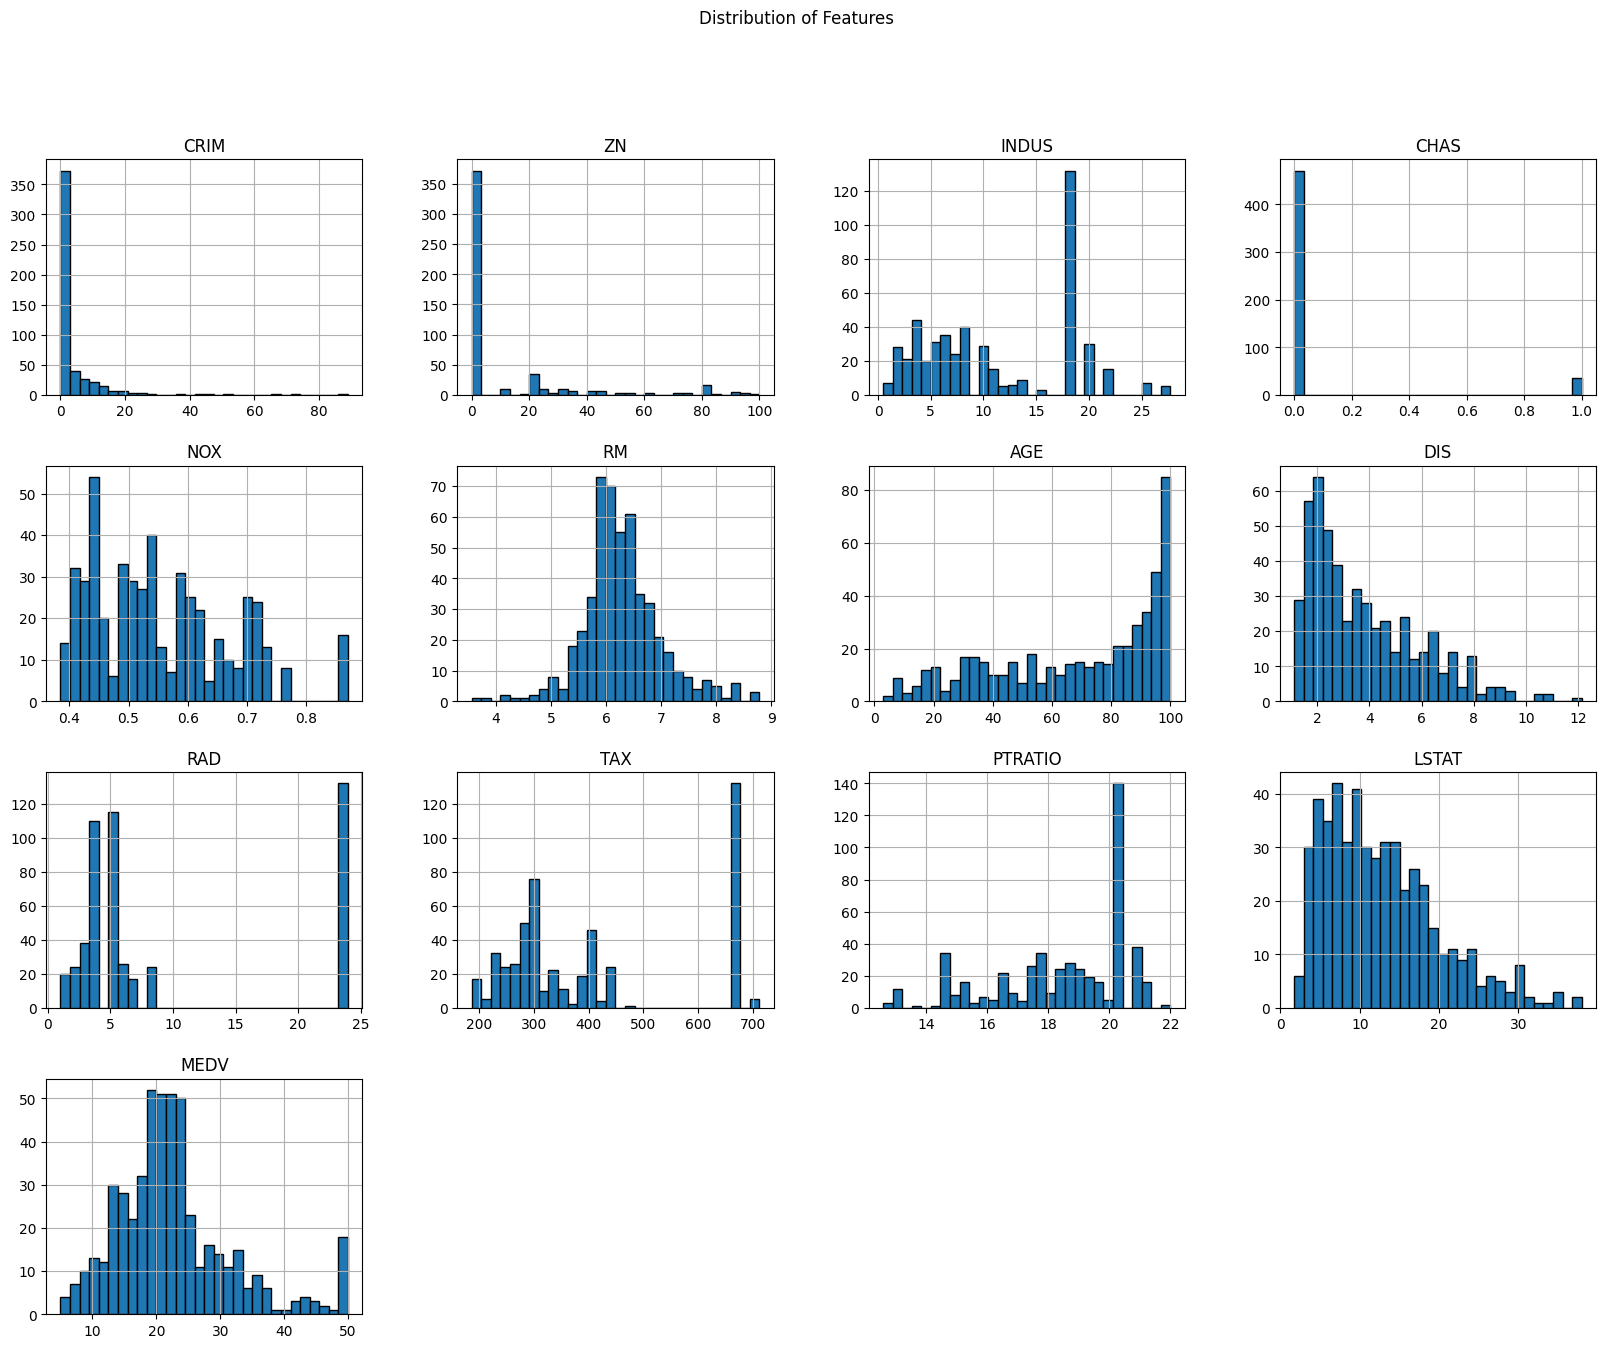

In [24]:
# Visualizar la distribución de las características
casas.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle('Distribution of Features')
plt.show()

In [25]:
# Seleccionar las características más relevantes
# Nos quedaremos con las características que tienen una alta correlación con la variable objetivo (MEDV)
# y que no están altamente correlacionadas entre sí para evitar multicolinealidad.
selected_features = ['RM', 'PTRATIO', 'LSTAT', 'NOX', 'DIS']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Mostrar las nuevas dimensiones de los conjuntos de datos
print(f"X_train_selected shape: {X_train_selected.shape}")
print(f"X_test_selected shape: {X_test_selected.shape}")

X_train_selected shape: (404, 5)
X_test_selected shape: (102, 5)


In [26]:
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar el escalador en los datos de entrenamiento y transformar tanto los datos de entrenamiento como los de prueba
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Convertir los datos escalados de nuevo a DataFrame para una mejor legibilidad
X_train_scaled = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=selected_features)

# Mostrar las primeras filas de los datos de entrenamiento escalados
X_train_scaled.head()

,RM,PTRATIO,LSTAT,NOX,DIS
0,-1.428069,0.845343,1.753505,0.489252,-0.802173
1,-0.680087,1.204741,-0.561474,-0.157233,0.324349
2,-0.402063,-0.637176,-0.651595,-1.008723,1.330697
3,-0.300450,0.845343,1.525387,0.489252,-0.839240
4,-0.831094,1.204741,-0.165787,-0.157233,-0.005494


In [27]:
# Inicializar el modelo de regresión lineal
linear_regression_model = linear_model.LinearRegression()

# Ajustar el modelo en los datos de entrenamiento
linear_regression_model.fit(X_train_scaled, y_train)

# Obtener los coeficientes del modelo
coefficients = linear_regression_model.coef_

# Crear un DataFrame para mostrar la importancia de las características
feature_importance = pd.DataFrame({'Característica': selected_features, 'Coeficiente': coefficients})

# Mostrar la importancia de las características
feature_importance


,Característica,Coeficiente
0,RM,3.219924
1,PTRATIO,-2.214225
2,LSTAT,-4.127738
3,NOX,-2.113137
4,DIS,-2.603842


In [28]:
# Predecir en el conjunto de prueba
y_pred = linear_regression_model.predict(X_test_scaled)

# Evaluar el modelo
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MAE: 3.272135228363099
MSE: 25.197619856350926
RMSE: 5.019723085624437
R2: 0.6563982005228932


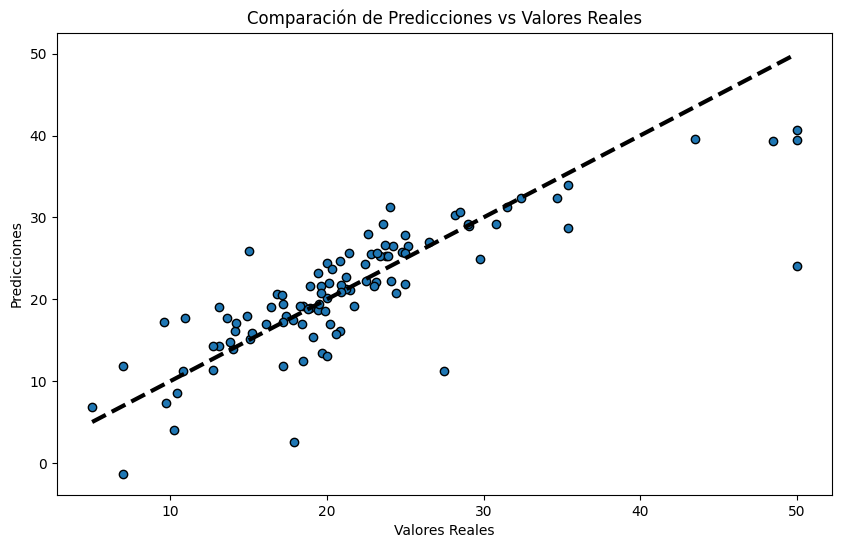

In [29]:
# Crear un gráfico de dispersión para comparar las predicciones con los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.show()

In [30]:
# Regularización con Ridge Regression
ridge_alphas = [0.1, 1.0, 10.0]
ridge_results = {}

for alpha in ridge_alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge_model.predict(X_test_scaled)
    ridge_mae = metrics.mean_absolute_error(y_test, y_pred_ridge)
    ridge_mse = metrics.mean_squared_error(y_test, y_pred_ridge)
    ridge_rmse = np.sqrt(ridge_mse)
    ridge_r2 = metrics.r2_score(y_test, y_pred_ridge)
    ridge_results[alpha] = {'MAE': ridge_mae, 'MSE': ridge_mse, 'RMSE': ridge_rmse, 'R2': ridge_r2}

print("Usando Ridge:")
for alpha, result in ridge_results.items():
    print(f"Alpha: {alpha}, MAE: {result['MAE']}, MSE: {result['MSE']}, RMSE: {result['RMSE']}, R2: {result['R2']}")


Usando Ridge:
Alpha: 0.1, MAE: 3.2719070569806075, MSE: 25.19564243805974, RMSE: 5.019526116881925, R2: 0.6564251651523718
Alpha: 1.0, MAE: 3.269871348398423, MSE: 25.17822311580791, RMSE: 5.017790660819552, R2: 0.6566626999078575
Alpha: 10.0, MAE: 3.253920220544678, MSE: 25.036659232876747, RMSE: 5.003664580372744, R2: 0.6585931046521711


In [31]:

# Regularización con ElasticNet
elasticnet_alphas = [0.1, 1.0, 10.0]
elasticnet_results = {}

for alpha in elasticnet_alphas:
    elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elasticnet_model.fit(X_train_scaled, y_train)
    y_pred_elasticnet = elasticnet_model.predict(X_test_scaled)
    elasticnet_mae = metrics.mean_absolute_error(y_test, y_pred_elasticnet)
    elasticnet_mse = metrics.mean_squared_error(y_test, y_pred_elasticnet)
    elasticnet_rmse = np.sqrt(elasticnet_mse)
    elasticnet_r2 = metrics.r2_score(y_test, y_pred_elasticnet)
    elasticnet_results[alpha] = {'MAE': elasticnet_mae, 'MSE': elasticnet_mse, 'RMSE': elasticnet_rmse, 'R2': elasticnet_r2}

print("Usando Elasticnet:")
for alpha, result in elasticnet_results.items():
    print(f"Alpha: {alpha}, MAE: {result['MAE']}, MSE: {result['MSE']}, RMSE: {result['RMSE']}, R2: {result['R2']}")

Usando Elasticnet:
Alpha: 0.1, MAE: 3.238636487013392, MSE: 24.929385695830334, RMSE: 4.992933576148428, R2: 0.6600559166389999
Alpha: 1.0, MAE: 3.5158705542942257, MSE: 28.10903728640964, RMSE: 5.301795666225702, R2: 0.6166972972748805
Alpha: 10.0, MAE: 5.947438325297078, MSE: 68.95899586390912, RMSE: 8.30415533717362, R2: 0.059655824476553154


### Conclusiones

Después de evaluar los modelos de regresión lineal, Ridge y ElasticNet, me quedaría con el modelo de **Ridge Regression con Alpha=10.0**. Este modelo tiene un rendimiento ligeramente mejor en términos de MAE, MSE y RMSE en comparación con la regresión lineal simple y ElasticNet. Además, la regularización de Ridge ayuda a reducir el sobreajuste, lo que puede mejorar la capacidad de generalización del modelo en datos no vistos.